There are 37 number of transcripts that are stimulated by pulse for C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv out of 73


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN23472_c0_g4,136.837478,10.659746,1.091058,9.476803,2.621938e-21,1.441280e-16
TRINITY_DN7216_c0_g3,1239.068453,28.346001,3.026219,9.261062,2.024093e-20,5.563220e-16
TRINITY_DN91484_c0_g1,349.940087,26.566316,3.026295,8.672756,4.217845e-18,7.728498e-14
TRINITY_DN14928_c0_g1,268.088232,25.927138,3.026327,8.461458,2.640555e-17,2.903026e-13
TRINITY_DN4143_c0_g1,64.817456,24.303367,3.026759,7.923779,2.303990e-15,1.809290e-11
TRINITY_DN74451_c0_g1,62.013393,24.247273,3.026785,7.905179,2.675493e-15,1.838398e-11
TRINITY_DN104146_c0_g1,123.376478,24.199692,3.026489,7.890231,3.016289e-15,1.842282e-11
TRINITY_DN12591_c0_g3,42.222408,23.704451,3.027064,7.725126,1.117429e-14,5.584096e-11
TRINITY_DN94453_c0_g1,39.547912,23.629875,3.027123,7.700340,1.357046e-14,6.216401e-11
TRINITY_DN25380_c0_g1,38.436871,23.594587,3.027150,7.688614,1.487373e-14,6.289301e-11


There are 37 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv out of 73


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN23472_c0_g4,136.837478,10.659746,1.091058,9.476803,2.621938e-21,1.441280e-16
TRINITY_DN7216_c0_g3,1239.068453,28.346001,3.026219,9.261062,2.024093e-20,5.563220e-16
TRINITY_DN91484_c0_g1,349.940087,26.566316,3.026295,8.672756,4.217845e-18,7.728498e-14
TRINITY_DN14928_c0_g1,268.088232,25.927138,3.026327,8.461458,2.640555e-17,2.903026e-13
TRINITY_DN4143_c0_g1,64.817456,24.303367,3.026759,7.923779,2.303990e-15,1.809290e-11
TRINITY_DN74451_c0_g1,62.013393,24.247273,3.026785,7.905179,2.675493e-15,1.838398e-11
TRINITY_DN104146_c0_g1,123.376478,24.199692,3.026489,7.890231,3.016289e-15,1.842282e-11
TRINITY_DN12591_c0_g3,42.222408,23.704451,3.027064,7.725126,1.117429e-14,5.584096e-11
TRINITY_DN94453_c0_g1,39.547912,23.629875,3.027123,7.700340,1.357046e-14,6.216401e-11
TRINITY_DN25380_c0_g1,38.436871,23.594587,3.027150,7.688614,1.487373e-14,6.289301e-11


There are 163 number of transcripts that are stimulated by pulse for C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv out of 213


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN80559_c0_g1,1134.992430,28.248276,3.026223,9.228756,2.737927e-20,1.007064e-15
TRINITY_DN400_c0_g1,380.063024,12.198269,1.397403,8.500244,1.891932e-17,1.739726e-13
TRINITY_DN63652_c0_g1,252.836034,26.187233,3.026342,8.547360,1.259361e-17,1.739726e-13
TRINITY_DN24209_c0_g1,137.422272,25.354937,3.026470,8.271992,1.317389e-16,5.384021e-13
TRINITY_DN54638_c3_g1,122.180508,25.091385,3.026505,8.184815,2.727216e-16,1.003125e-12
...,...,...,...,...,...,...
TRINITY_DN9139_c0_g1,54.122365,6.078233,1.581961,3.639934,2.727076e-04,4.865627e-02
TRINITY_DN14207_c1_g1,7.046560,6.446953,1.685950,3.634126,2.789251e-04,4.885439e-02
TRINITY_DN8118_c0_g1,23.111804,8.159760,2.156862,3.634799,2.781979e-04,4.885439e-02
TRINITY_DN14565_c0_g4,26.629806,8.362091,2.216399,3.628449,2.851286e-04,4.938587e-02


There are 163 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv out of 213


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN80559_c0_g1,1134.992430,28.248276,3.026223,9.228756,2.737927e-20,1.007064e-15
TRINITY_DN400_c0_g1,380.063024,12.198269,1.397403,8.500244,1.891932e-17,1.739726e-13
TRINITY_DN63652_c0_g1,252.836034,26.187233,3.026342,8.547360,1.259361e-17,1.739726e-13
TRINITY_DN24209_c0_g1,137.422272,25.354937,3.026470,8.271992,1.317389e-16,5.384021e-13
TRINITY_DN54638_c3_g1,122.180508,25.091385,3.026505,8.184815,2.727216e-16,1.003125e-12
...,...,...,...,...,...,...
TRINITY_DN9139_c0_g1,54.122365,6.078233,1.581961,3.639934,2.727076e-04,4.865627e-02
TRINITY_DN14207_c1_g1,7.046560,6.446953,1.685950,3.634126,2.789251e-04,4.885439e-02
TRINITY_DN8118_c0_g1,23.111804,8.159760,2.156862,3.634799,2.781979e-04,4.885439e-02
TRINITY_DN14565_c0_g4,26.629806,8.362091,2.216399,3.628449,2.851286e-04,4.938587e-02


There are 36 number of transcripts that are not stimulated by pulse for C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv out of 73


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN4262_c0_g1,405.842572,-25.963193,3.026267,-8.473538,2.380496e-17,2.903026e-13
TRINITY_DN16255_c1_g1,353.639466,-25.668642,3.026279,-8.376174,5.467623e-17,5.009254e-13
TRINITY_DN52729_c0_g1,142.271145,-24.021927,3.026417,-7.831679,4.813957e-15,2.646232e-11
TRINITY_DN118079_c0_g1,69.614371,-22.814603,3.026657,-7.432160,1.068383e-13,3.454647e-10
TRINITY_DN20030_c0_g1,34.243799,-22.516980,3.027143,-7.332650,2.256463e-13,6.890989e-10
TRINITY_DN14638_c5_g1,31.757477,-22.414531,3.027218,-7.298626,2.907219e-13,8.411044e-10
TRINITY_DN65574_c0_g1,31.839701,-22.389951,3.027216,-7.290512,3.087793e-13,8.486800e-10
TRINITY_DN36581_c0_g1,27.977487,-22.231592,3.027358,-7.237860,4.558207e-13,1.193165e-09
TRINITY_DN49605_c2_g1,24.229416,-22.038273,3.027538,-7.173575,7.306416e-13,1.825608e-09
TRINITY_DN95700_c0_g1,36.176275,-8.566406,1.156575,-7.130025,1.003506e-12,2.398379e-09


There are 50 number of transcripts that are not stimulated by pulse for C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv out of 213


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN632_c0_g3,135.001053,-10.377191,1.181207,-8.514334,1.675505e-17,1.739726e-13
TRINITY_DN142870_c0_g1,26.406180,-22.062611,2.573997,-8.447021,2.988288e-17,2.198304e-13
TRINITY_DN1404_c0_g2,27.399848,-22.115457,2.601139,-8.379196,5.329057e-17,2.732143e-13
TRINITY_DN63294_c0_g1,25.614330,-22.020876,2.585607,-8.392952,4.740848e-17,2.732143e-13
TRINITY_DN91484_c0_g1,342.952705,-25.638923,3.026276,-8.366364,5.942347e-17,2.732143e-13
TRINITY_DN12591_c0_g3,128.012131,-24.258971,3.026425,-7.909984,2.574223e-15,7.136885e-12
TRINITY_DN74643_c0_g1,125.733007,-24.238735,3.026429,-7.903286,2.716448e-15,7.136885e-12
TRINITY_DN1857_c1_g1,95.356237,-23.807779,3.026506,-7.760691,8.446807e-15,1.827591e-11
TRINITY_DN136924_c0_g1,105.983540,-23.536548,3.026474,-7.671154,1.704563e-14,3.299854e-11
TRINITY_DN449_c1_g1,72.854065,-22.937677,3.026605,-7.472953,7.841490e-14,1.373456e-10


There are 50 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv out of 50


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN632_c0_g3,135.001053,-10.377191,1.181207,-8.514334,1.675505e-17,1.739726e-13
TRINITY_DN142870_c0_g1,26.406180,-22.062611,2.573997,-8.447021,2.988288e-17,2.198304e-13
TRINITY_DN1404_c0_g2,27.399848,-22.115457,2.601139,-8.379196,5.329057e-17,2.732143e-13
TRINITY_DN63294_c0_g1,25.614330,-22.020876,2.585607,-8.392952,4.740848e-17,2.732143e-13
TRINITY_DN91484_c0_g1,342.952705,-25.638923,3.026276,-8.366364,5.942347e-17,2.732143e-13
TRINITY_DN12591_c0_g3,128.012131,-24.258971,3.026425,-7.909984,2.574223e-15,7.136885e-12
TRINITY_DN74643_c0_g1,125.733007,-24.238735,3.026429,-7.903286,2.716448e-15,7.136885e-12
TRINITY_DN1857_c1_g1,95.356237,-23.807779,3.026506,-7.760691,8.446807e-15,1.827591e-11
TRINITY_DN136924_c0_g1,105.983540,-23.536548,3.026474,-7.671154,1.704563e-14,3.299854e-11
TRINITY_DN449_c1_g1,72.854065,-22.937677,3.026605,-7.472953,7.841490e-14,1.373456e-10


There are 36 number of transcripts that are stimulated by pulse that have a p value of 0.05 or below for C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv out of 36


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TRINITY_DN4262_c0_g1,405.842572,-25.963193,3.026267,-8.473538,2.380496e-17,2.903026e-13
TRINITY_DN16255_c1_g1,353.639466,-25.668642,3.026279,-8.376174,5.467623e-17,5.009254e-13
TRINITY_DN52729_c0_g1,142.271145,-24.021927,3.026417,-7.831679,4.813957e-15,2.646232e-11
TRINITY_DN118079_c0_g1,69.614371,-22.814603,3.026657,-7.432160,1.068383e-13,3.454647e-10
TRINITY_DN20030_c0_g1,34.243799,-22.516980,3.027143,-7.332650,2.256463e-13,6.890989e-10
TRINITY_DN14638_c5_g1,31.757477,-22.414531,3.027218,-7.298626,2.907219e-13,8.411044e-10
TRINITY_DN65574_c0_g1,31.839701,-22.389951,3.027216,-7.290512,3.087793e-13,8.486800e-10
TRINITY_DN36581_c0_g1,27.977487,-22.231592,3.027358,-7.237860,4.558207e-13,1.193165e-09
TRINITY_DN49605_c2_g1,24.229416,-22.038273,3.027538,-7.173575,7.306416e-13,1.825608e-09
TRINITY_DN95700_c0_g1,36.176275,-8.566406,1.156575,-7.130025,1.003506e-12,2.398379e-09


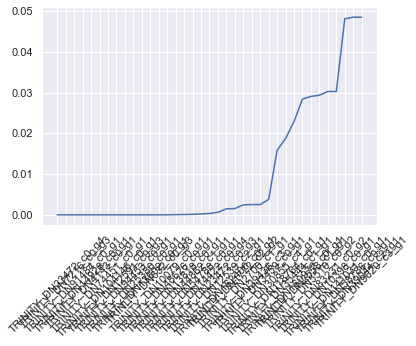

In [6]:
"""
Functions for Filtering Stimulated Pulses



"""
#Function that accepts a csv filename and a column to look in for positive values in the column ('log2fold' in this case) given.
#The function accepts a csv file and a column name in the form of Python strings to search through, and returns a dataframe
#
def pulseStimulationCheckForPositives(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    positive_log_fold_df = df[df[search_column_name] > 0]
    print("There are " + str(len(positive_log_fold_df.index)) + " number of transcripts that are stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return positive_log_fold_df


#Same function as first function, except a significance level (p-value) is given as a threshold and another column is given 
#for the 
#to find statiscially significant data (Data <= the p value)
def pulseStimulationSignificantDataCheck(csv_filename: str, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
    print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))
    
    return df_copy

#Function that checks for negatives in a given column ('log2fold' in this case) and returns a dataframe with the negatives
def NegativeLogFoldChecker(csv_filename: str, search_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    negative_log_fold_df = df[df[search_column_name] <= 0]
    print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
          + csv_filename + " out of " + str(len(df))) 
    
    return negative_log_fold_df

#Same function as the previous one, but with 
def NegativeLogFoldCheckerSignificantDataChecker(csv_filename: str, search_column_name: str,  p_value: float,
                                         padj_value_column_name: str):
    import pandas as pd
    df = pd.read_csv(csv_filename, index_col=0)
    significant_data_negative_log_fold_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
    print("There are " + str(len(significant_data_negative_log_fold_df.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
+ str(p_value) + " or below for " + csv_filename + " out of " + str(len(significant_data_negative_log_fold_df)))
    
    return significant_data_negative_log_fold_df
    
def CsvFileExporter(df, df_name, index_header):
    import pandas as pd
    return df.to_csv(df_name, index = index_header)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Looking for positive values in the log2fold column
df_zt12_nozeros = pulseStimulationCheckForPositives('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
display(df_zt12_nozeros)
df1_filtered_zt12_nozeros = pulseStimulationSignificantDataCheck('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
display(df1_filtered_zt12_nozeros)

df_zt3_nozeros = pulseStimulationCheckForPositives('C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
display(df_zt3_nozeros)

df1_filtered_zt3_nozeros = pulseStimulationSignificantDataCheck('C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, 'padj')
display(df1_filtered_zt3_nozeros)

df_nonfiltered_zt12 = NegativeLogFoldChecker('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv', 'log2FoldChange')
display(df_nonfiltered_zt12)

df_nonfiltered_zt3 = NegativeLogFoldChecker('C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv', 'log2FoldChange')
display(df_nonfiltered_zt3)

df_negative_log_fold_p_value_zt3 = NegativeLogFoldCheckerSignificantDataChecker('C:/Users/etai/Downloads/collectionTime_3.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
display(df_negative_log_fold_p_value_zt3)

df_negative_log_fold_p_value_zt12 = NegativeLogFoldCheckerSignificantDataChecker('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv', 
                                                   'log2FoldChange', 0.05, "padj")
display(df_negative_log_fold_p_value_zt12)

CsvFileExporter(df_zt12_nozeros, "df_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df1_filtered_zt12_nozeros, "df1_filtered_zt12_nozeros.csv", 'Transcripts')
CsvFileExporter(df_zt3_nozeros, "df_zt3_nozeros.csv" ,'Transcripts')
CsvFileExporter(df1_filtered_zt3_nozeros, "df1_filtered_zt3_nozeros.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt12, "df_nonfiltered_zt12.csv", 'Transcripts')
CsvFileExporter(df_nonfiltered_zt3, "df_nonfiltered_zt3.csv", 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt3, 'df_negative_log_fold_p_value_zt3', 'Transcripts')
CsvFileExporter(df_negative_log_fold_p_value_zt12, 'df_negative_log_fold_p_value_zt12', 'Transcripts')

plt.plot(df_zt12_nozeros.padj)
#plt.plot(df_zt12_nozeros.index, df1_filtered_zt12_nozeros.padj)
plt.xticks()

plt.show()



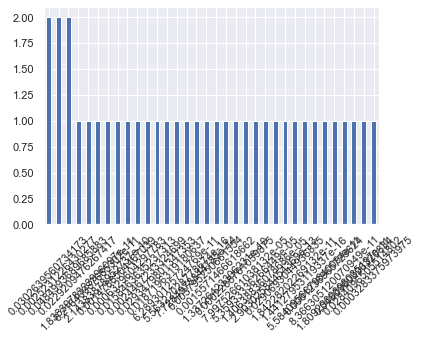

In [18]:
#sns.histplot(df_zt12_nozeros.padj, color = 'red')
#sns.histplot(df1_filtered_zt12_nozeros.padj, color = 'blue')
import scipy.stats as stats
(df_zt12_nozeros.padj.value_counts().plot(kind = 'bar'))
density = stats.gaussian_kde(df_zt12_nozeros.padj)
plt.plot()
plt.xticks(rotation = 45)
plt.show()

In [10]:
# Sorry, I was exploring classes since both functions have aspects that are the same
class pulseCheck():
    import pandas as pd
    def __init__(self, csv_filename):
        self.csv_filename = csv_filename
        
    def pulseStimulationCheck(self, search_column_name):
        import pandas as pd
        df = pd.read_csv(self.csv_filename, index_col=0)
        df_copy = df[df[search_column_name] > 0]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse.")
        return df_copy
    
    def pulseStimulationSignificantDataCheck(self, search_column_name: str, p_value: float,
                                         padj_value_column_name: str):
        df = pd.read_csv(csv_filename, index_col=0)
        df_copy = df[(df[padj_value_column_name] <= p_value) & (df[search_column_name] > 0)]
        print("There are " + str(len(df_copy.index)) + " number of transcripts that are stimulated by pulse that have a p value of " 
    + str(p_value) + " or below for " + csv_filename + " out of " + str(len(df.index)))

        return df_copy
    
    def NegativeLogFoldChecker(self, search_column_name: str):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[df[search_column_name] <= 0]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def NegativeLogFoldCheckerSignificantDataChecker(self, search_column_name: str,  p_value: float,
                                             padj_value_column_name: str):
        import pandas as pd
        df = pd.read_csv(csv_filename, index_col=0)
        negative_log_fold_df = df[(df[search_column_name] <= 0) & (df[padj_value_column_name] <= p_value)]
        print("There are " + str(len(negative_log_fold_df.index)) + " number of transcripts that are not stimulated by pulse for " 
              + csv_filename + " out of " + str(len(df))) 

        return negative_log_fold_df

    def CsvFileExporter(self, df, df_name, index_header):
        import pandas as pd
        return df.to_csv(df_name, index = index_header)

df = pulseCheck('C:/Users/etai/Downloads/collectionTime_12.pulseConditionsNoZeros.csv')
df_zt12_nozeros = df.pulseStimulationCheck('log2FoldChange')


There are 37 number of transcripts that are stimulated by pulse.
